In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from seaborn import heatmap
import networkx as nx
import queue

In [2]:
def print_board(board):
    for i in range(9):
        if i % 3 == 0 and i != 0:
            print("- - - - - - - - - - - - ")
        for j in range(9):
            if j % 3 == 0 and j != 0:
                print("| ", end="")
            if j == 8:
                print(board[i][j])
            else:
                print(str(board[i][j]) + " ", end="")


Displaying Sudoku board with numbers and colorbar:


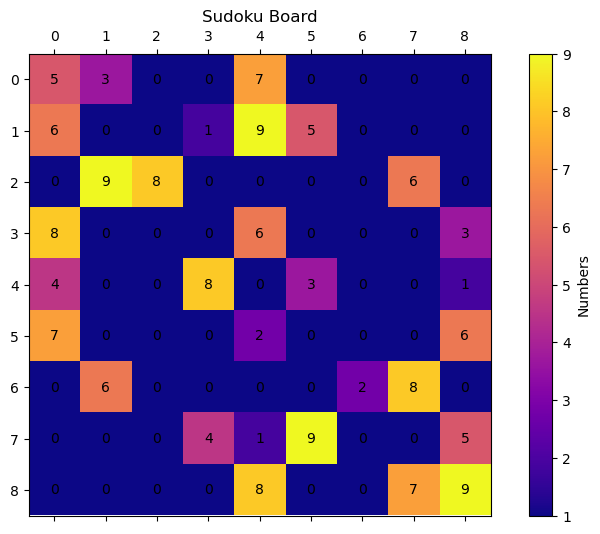


Displaying Sudoku board with empty cells highlighted and colorbar:


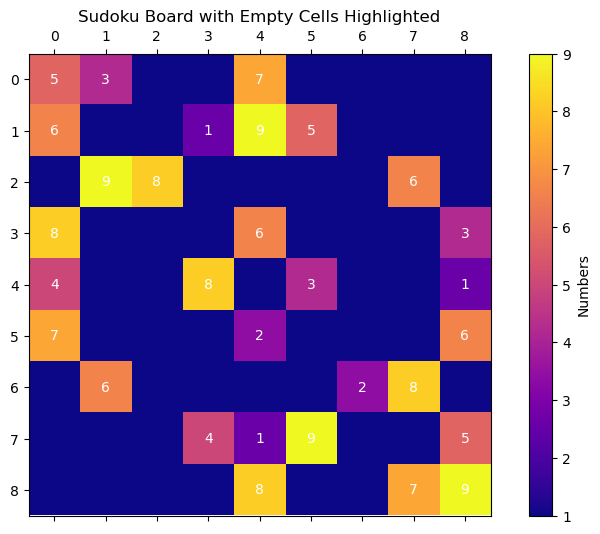

In [3]:
def showSudoku(board):
    ''' Display the Sudoku board with numbers and a colorbar
        Input : 2D NumPy array representing the Sudoku board
        Output : Display the Sudoku board with numbers and a colorbar
    '''
    fig, ax = plt.subplots(figsize=(10, 6))

    # Show Sudoku board with numbers
    ax.matshow(board, cmap='plasma')
    for i in range(9):
        for j in range(9):
            ax.text(j, i, str(board[i, j]), va='center', ha='center', color='black')

    ax.grid(visible=False)
    ax.set_title('Sudoku Board')

    # Create colorbar
    cmap = plt.cm.plasma
    norm = plt.Normalize(vmin=1, vmax=9)
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, ticks=np.arange(1, 10))
    cb.set_label('Numbers')
    cb.set_ticklabels(np.arange(1, 10))

    plt.show()

def showSudokuProblem(board):
    ''' Display the Sudoku board with empty cells highlighted and a colorbar
        Input : 2D NumPy array representing the Sudoku board
        Output : Display the Sudoku board with empty cells highlighted and a colorbar
    '''
    highlighted_board = np.copy(board)
    highlighted_board[highlighted_board == 0] = -1

    fig, ax = plt.subplots(figsize=(10, 6))

    # Show Sudoku board with empty cells highlighted
    ax.matshow(highlighted_board, cmap='plasma')
    for i in range(9):
        for j in range(9):
            if highlighted_board[i, j] != -1:
                ax.text(j, i, str(highlighted_board[i, j]), va='center', ha='center', color='white')

    ax.grid(visible=False)
    ax.set_title('Sudoku Board with Empty Cells Highlighted')

    # Create colorbar
    cmap = plt.cm.plasma
    norm = plt.Normalize(vmin=1, vmax=9)
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, ticks=np.arange(1, 10))
    cb.set_label('Numbers')
    cb.set_ticklabels(np.arange(1, 10))

    plt.show()

# Example Sudoku board
board = np.array([
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
])


print("\nDisplaying Sudoku board with numbers and colorbar:")
showSudoku(board)
print("\nDisplaying Sudoku board with empty cells highlighted and colorbar:")
showSudokuProblem(board)



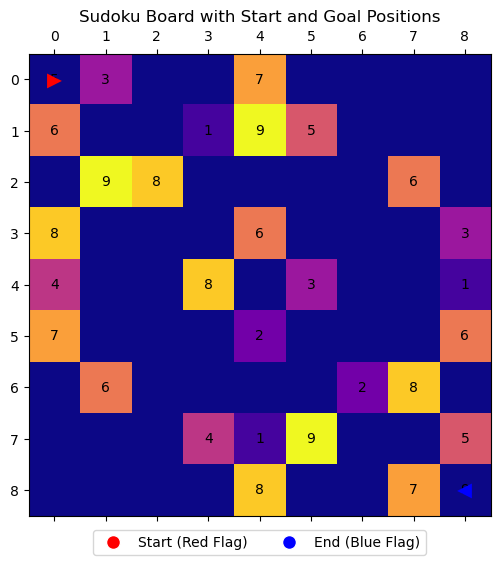

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def showSudokuProblem(board, start, goal):
    ''' Display the Sudoku board with start and end positions indicated by symbols
        Input : 2D NumPy array representing the Sudoku board
                start: tuple representing the coordinates of the start position (row, col)
                goal: tuple representing the coordinates of the goal position (row, col)
        Output : Display the Sudoku board with start and end positions indicated by symbols
    '''
    # Create a copy of the board
    board_with_positions = np.copy(board)

    # Highlight start and goal positions with symbols
    start_row, start_col = start
    goal_row, goal_col = goal
    board_with_positions[start_row, start_col] = 0
    board_with_positions[goal_row, goal_col] = 0

    # Create an arrow symbol for start and goal positions
    start_arrow = u'\u25b6'  # Right-pointing arrow
    goal_arrow = u'\u25c0'   # Left-pointing arrow

    fig, ax = plt.subplots(figsize=(6, 6))

    # Show Sudoku board with start and end positions indicated by symbols
    ax.matshow(board_with_positions, cmap='plasma')
    for i in range(9):
        for j in range(9):
            if board[i, j] != 0:
                ax.text(j, i, str(board[i, j]), va='center', ha='center', color='black')

    # Annotate start and goal positions with arrows
    ax.text(start_col, start_row, start_arrow, va='center', ha='center', color='red', fontsize=14)
    ax.text(goal_col, goal_row, goal_arrow, va='center', ha='center', color='blue', fontsize=14)

    ax.grid(visible=False)
    ax.set_title('Sudoku Board with Start and Goal Positions')

    # Add legend
    legend_handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Start (Red Flag)'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='End (Blue Flag)')
    ]
    ax.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)

    plt.show()

# Define start and goal positions for Sudoku puzzle
START = (0, 0)  # Top-left corner (example start position)
GOAL = (8, 8)   # Bottom-right corner (example goal position)

# Example Sudoku board (with some numbers already given)
board = np.array([
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
])

# Display the Sudoku puzzle with start and goal positions indicated by symbols and legend
showSudokuProblem(board, START, GOAL)


In [5]:
class SudokuGraph(object):
    ''' Class to represent a graph for Sudoku puzzle
        Construction: Using Edges
    '''
    def __init__(self):
        self.edges = {}

    def add_edge(self, node, neighbor):
        ''' Add an edge between two nodes '''
        if node in self.edges:
            self.edges[node].add(neighbor)
        else:
            self.edges[node] = {neighbor}

    def all_edges(self):
        ''' Get all edges in the graph '''
        return self.edges

    def neighbors(self, node):
        ''' Get neighbors of a node '''
        return self.edges[node]

In [6]:
def initialize_sudoku_graph(board):
    sudoku_graph = SudokuGraph()
    board_size = len(board)

    # Create nodes for each cell
    for i in range(board_size):
        for j in range(board_size):
            sudoku_graph.edges[(i, j)] = set()

    # Add edges between cells in the same row, column, and block
    for i in range(board_size):
        for j in range(board_size):
            for k in range(board_size):
                if k != j:
                    sudoku_graph.edges[(i, j)].add((i, k))  # Row
                if k != i:
                    sudoku_graph.edges[(i, j)].add((k, j))  # Column

            subgrid_size = int(board_size ** 0.5)
            start_row, start_col = subgrid_size * (i // subgrid_size), subgrid_size * (j // subgrid_size)
            for m in range(start_row, start_row + subgrid_size):
                for n in range(start_col, start_col + subgrid_size):
                    if m != i or n != j:
                        sudoku_graph.edges[(i, j)].add((m, n))  # Block

    return sudoku_graph

In [7]:
sudoku_graph = initialize_sudoku_graph(board)

In [8]:
sudoku_graph.all_edges()

{(0, 0): {(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2),
  (3, 0),
  (4, 0),
  (5, 0),
  (6, 0),
  (7, 0),
  (8, 0)},
 (0, 1): {(0, 0),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1)},
 (0, 2): {(0, 0),
  (0, 1),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2),
  (3, 2),
  (4, 2),
  (5, 2),
  (6, 2),
  (7, 2),
  (8, 2)},
 (0, 3): {(0, 0),
  (0, 1),
  (0, 2),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (1, 3),
  (1, 4),
  (1, 5),
  (2, 3),
  (2, 4),
  (2, 5),
  (3, 3),
  (4, 3),
  (5, 3),
  (6, 3),
  (7, 3),
  (8, 3)},
 (0, 4): {(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (1, 3),
  (1, 4),
  (1, 5),
  (2, 3),
  (2, 4),
  (2, 5),
  (3, 4),
  (4, 

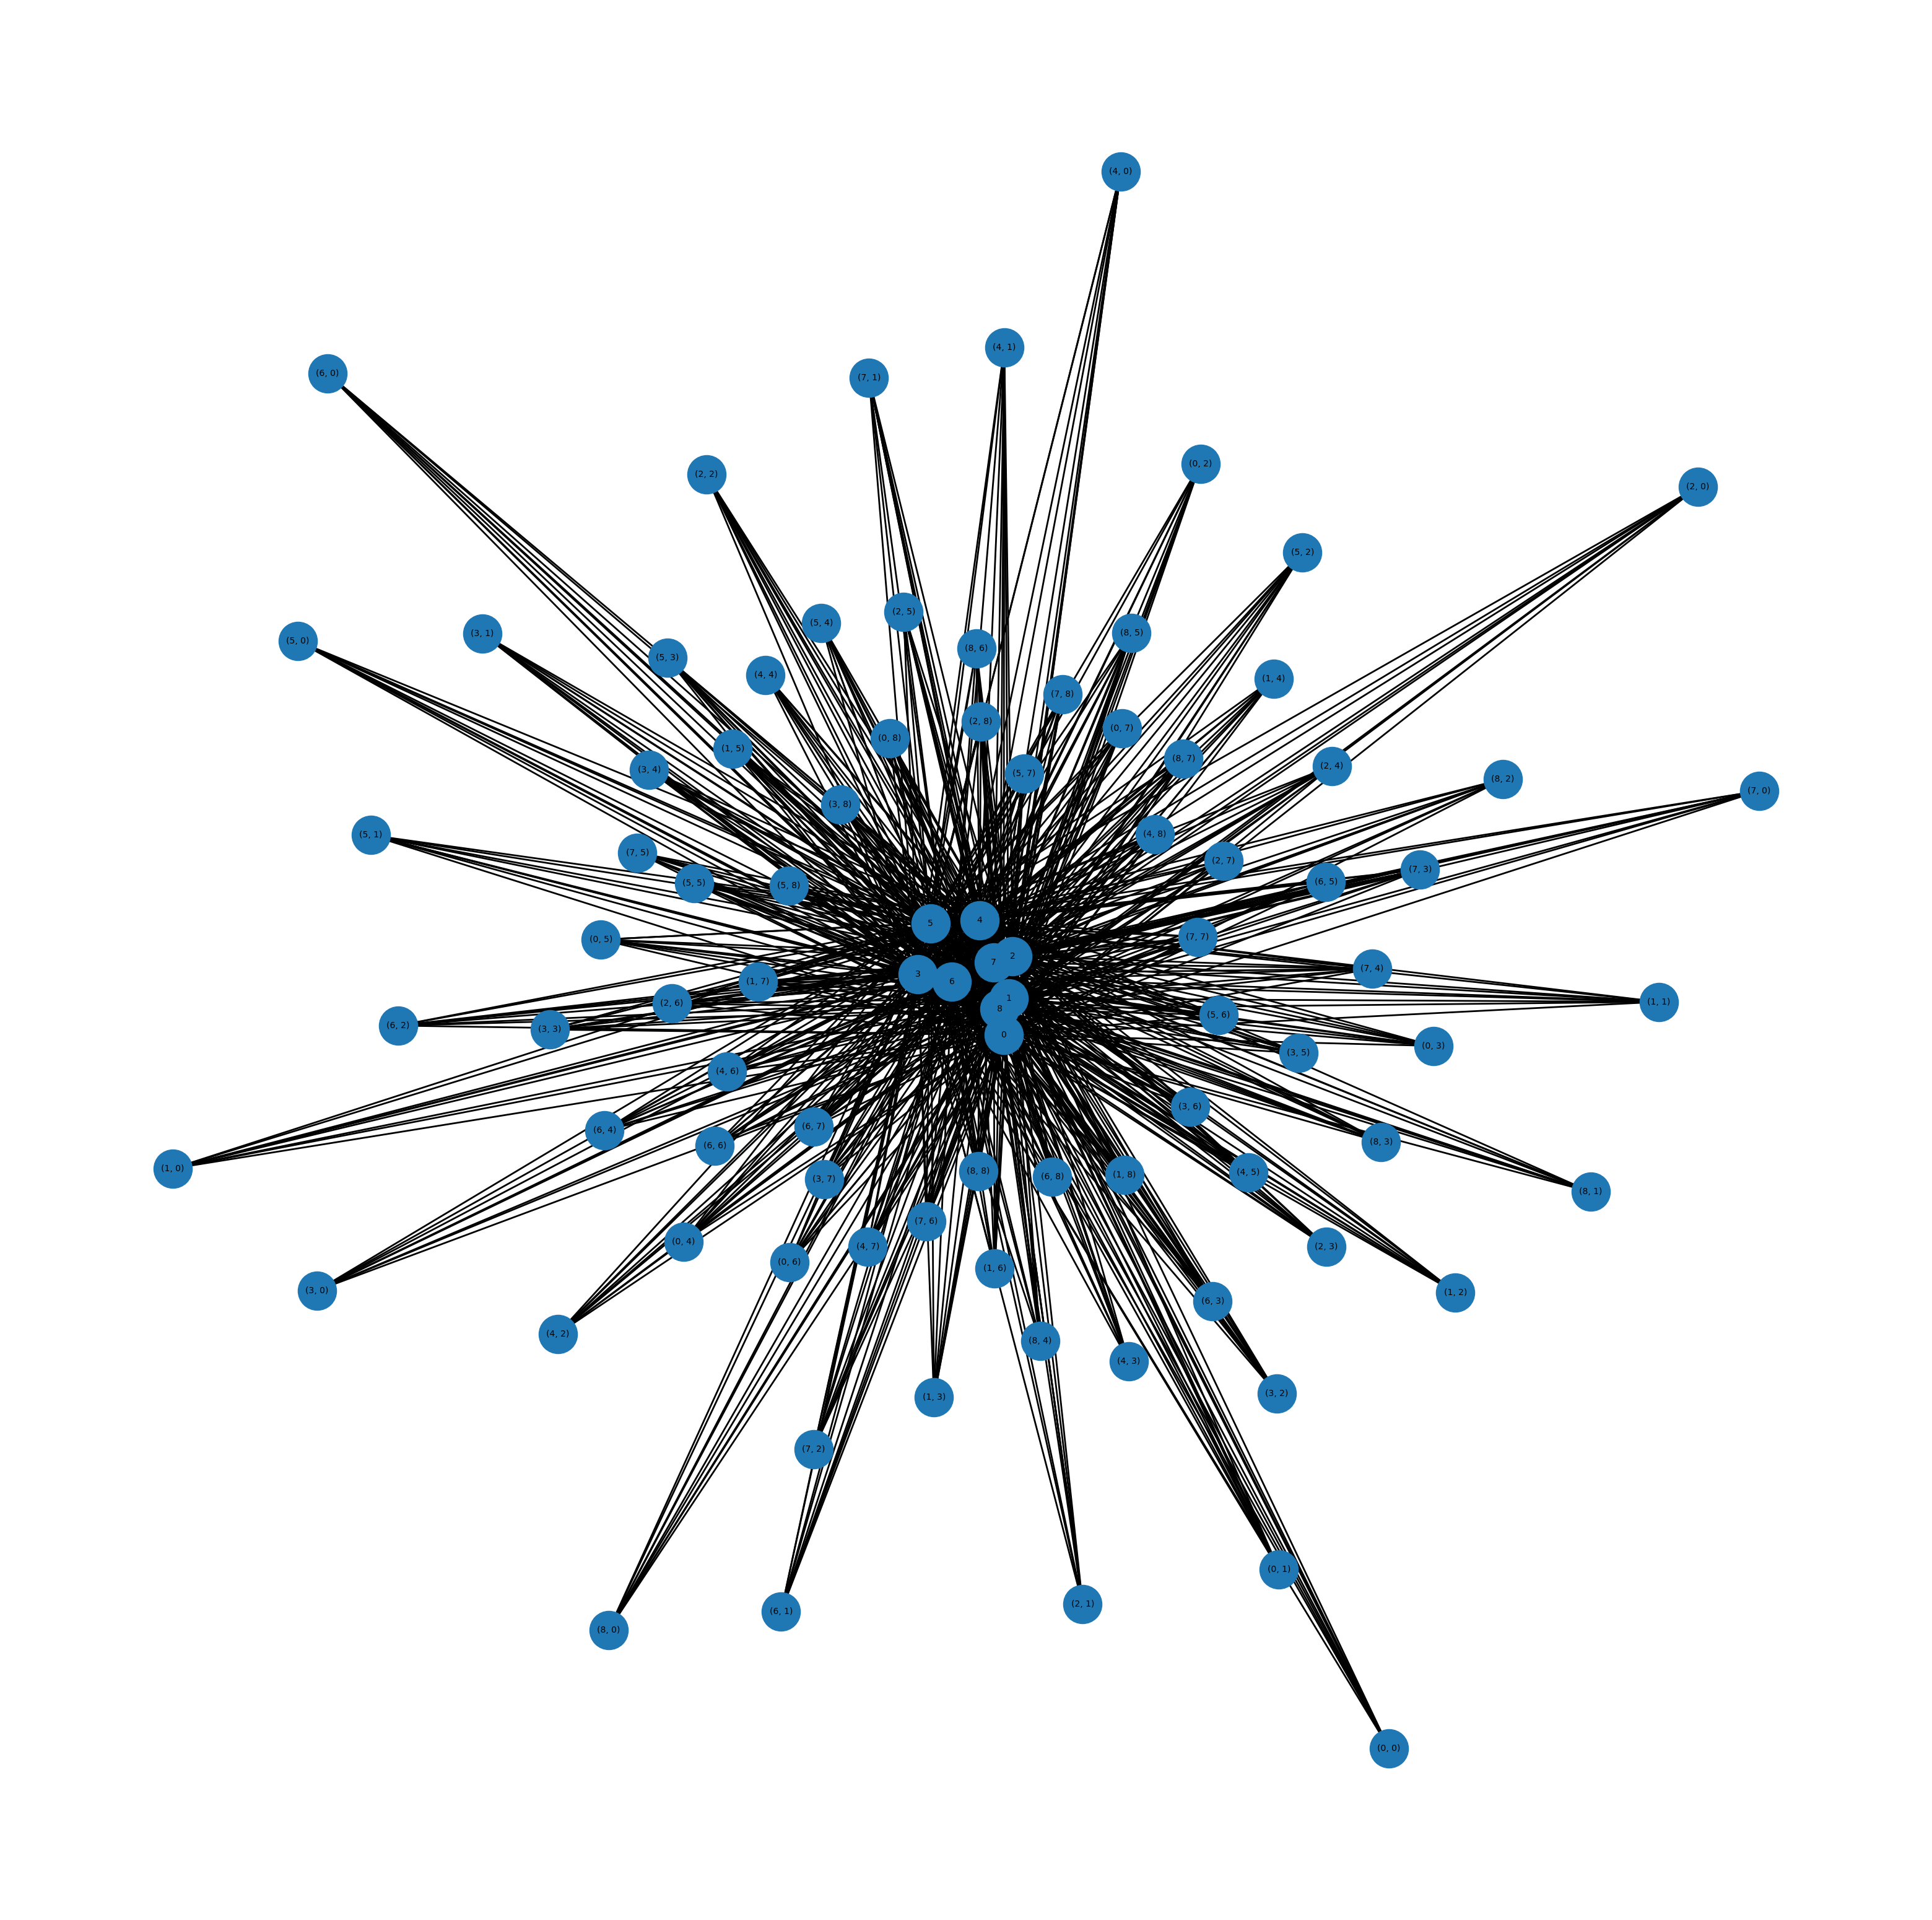

In [9]:
# Helper functions to display a Graph

def showSudokuGraph(sudokuGraph):
    ''' Display a graph using networkx
        Input : MazeGraph from 2D maze
        Output : Input graph displayed
    '''
    edgeDict = sudokuGraph.all_edges()
    edgeList = []
    for node in edgeDict:
        for neighbor, weight in edgeDict[node]:
            edgeList.append((node,neighbor, {'weight': weight}))

    G = nx.Graph()
    G.add_edges_from(edgeList)

    f = plt.figure(figsize = (40,40))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size = 2000)
    nx.draw_networkx_edges(G, pos, width = 2)
    nx.draw_networkx_labels(G, pos, font_size = 10)

    plt.axis("off")
    plt.show()
showSudokuGraph(sudoku_graph)

# Depth first seach

In [100]:
# Depth-First-Search (DFS) algorithm
def depth_first_search(sudoku_graph, start, goal):
    frontier = queue.LifoQueue()
    frontier.put(start)
    explored = {}
    explored[start] = None
    processed = 0
    
    while not frontier.empty():
        current_node = frontier.get()
        processed += 1
        
        if current_node == goal:
            break
        
        for next_node in sudoku_graph.edges[current_node]:
            if next_node not in explored:
                frontier.put(next_node)
                explored[next_node] = current_node
    
    return explored, processed

# Reconstruct the path
def reconstruct_path(explored, start, goal):
    current_node = goal
    path = []
    while current_node != start:
        path.append(current_node)
        current_node = explored[current_node]
    path.append(start)
    path.reverse()
    return path

# Define start and goal positions
START = (0, 0)  # Adjust as needed
GOAL = (8, 8)

# Create the Sudoku graph
sudoku_graph = initialize_sudoku_graph(sudoku_board)

# Run the DFS algorithm for path finding
explored, processed = depth_first_search(sudoku_graph, start=START, goal=GOAL)
path = reconstruct_path(explored, start=START, goal=GOAL)

# Basic measures for the algorithm
print("Depth-First-Search (DFS)")
print()
total_nodes = 81  # Total number of cells in a Sudoku puzzle
print("Total nodes in Sudoku puzzle:", total_nodes)
print("Total nodes visited:", processed, "|", np.round(100 * (processed / total_nodes), 2), "%")
print("Final path length:", len(path))
print()

# Print the path
print("Path through the Sudoku puzzle:", path)

Depth-First-Search (DFS)

Total nodes in Sudoku puzzle: 81
Total nodes visited: 31 | 38.27 %
Final path length: 6

Path through the Sudoku puzzle: [(0, 0), (6, 0), (6, 3), (7, 5), (7, 8), (8, 8)]


# Backtracking without constraint propagation


In [101]:
def is_valid(board, row, col, num):
    # Check if the number is not already present in the row
    if num in board[row]:
        return False
    
    # Check if the number is not already present in the column
    for i in range(9):
        if board[i][col] == num:
            return False
    
    # Check if the number is not already present in the 3x3 subgrid
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if board[i][j] == num:
                return False
    
    return True

def solve_sudoku(board):
    empty_cell = find_empty_cell(board)
    if not empty_cell:
        return True  # Puzzle solved successfully
    
    row, col = empty_cell
    
    for num in range(1, 10):
        if is_valid(board, row, col, num):
            board[row][col] = num
            
            if solve_sudoku(board):
                return True
            
            board[row][col] = 0  # Backtrack
            
    return False

def find_empty_cell(board):
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return (i, j)
    return None

def print_board(board):
    for row in board:
        print(" ".join(map(str, row)))

# Example puzzle
board = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

print("Original Sudoku Puzzle:")
print_board(board)
print("\nSolving...\n")

if solve_sudoku(board):
    print("Sudoku Puzzle Solved Successfully:")
    print_board(board)
else:
    print("No solution exists for the Sudoku puzzle.")


Original Sudoku Puzzle:
5 3 0 0 7 0 0 0 0
6 0 0 1 9 5 0 0 0
0 9 8 0 0 0 0 6 0
8 0 0 0 6 0 0 0 3
4 0 0 8 0 3 0 0 1
7 0 0 0 2 0 0 0 6
0 6 0 0 0 0 2 8 0
0 0 0 4 1 9 0 0 5
0 0 0 0 8 0 0 7 9

Solving...

Sudoku Puzzle Solved Successfully:
5 3 4 6 7 8 9 1 2
6 7 2 1 9 5 3 4 8
1 9 8 3 4 2 5 6 7
8 5 9 7 6 1 4 2 3
4 2 6 8 5 3 7 9 1
7 1 3 9 2 4 8 5 6
9 6 1 5 3 7 2 8 4
2 8 7 4 1 9 6 3 5
3 4 5 2 8 6 1 7 9


# Breadth first search


In [8]:
def is_valid(num, edges, board):
    
    for edge in edges:
        if num == board[edge[0]][edge[1]]:
            return False
    return True

def find_empty_cell(board):
    # Find an empty cell (a cell with 0)
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return i, j
    return None
    
def solve_sudoku_bfs(board, graph):
    # Create a queue for BFS
    queue = []
    counter = 0;

    # Enqueue initial board
    queue.append(board)

    # Start BFS
    while queue:
        current_board = queue.pop(0)
        # Find an empty cell
        empty_cell = find_empty_cell(current_board)
        # If there are no empty cells left, the puzzle is solved
        if empty_cell is None:
            print("steps taken:", counter)
            return current_board
        row, col = empty_cell
        # Try placing numbers 1-9 in the empty cell
        for num in range(1, 10):
            if is_valid(num, graph.all_edges()[(row,col)], current_board):
                counter+=1
                print("trying ", num," on (",row,col,")")
                # Make a copy of the board and place the number in the empty cell
                new_board = [row[:] for row in current_board]
                new_board[row][col] = num
                # Enqueue the new board
                queue.append(new_board)
        

In [14]:
board = [
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
]
sudoku_graph = initialize_sudoku_graph(board)
finish_board = solve_sudoku_bfs(board,sudoku_graph)

trying  2  on ( 0 1 )
trying  3  on ( 0 1 )
trying  4  on ( 0 1 )
trying  5  on ( 0 1 )
trying  3  on ( 0 3 )
trying  4  on ( 0 3 )
trying  2  on ( 0 3 )
trying  4  on ( 0 3 )
trying  2  on ( 0 3 )
trying  3  on ( 0 3 )
trying  2  on ( 0 3 )
trying  3  on ( 0 3 )
trying  4  on ( 0 3 )
trying  4  on ( 0 4 )
trying  4  on ( 0 4 )
trying  4  on ( 0 4 )
trying  4  on ( 0 4 )
trying  5  on ( 0 6 )
trying  5  on ( 0 6 )
trying  3  on ( 0 6 )
trying  2  on ( 0 6 )
trying  3  on ( 1 1 )
trying  4  on ( 1 1 )
trying  2  on ( 1 1 )
trying  4  on ( 1 1 )
trying  2  on ( 1 1 )
trying  3  on ( 1 1 )
trying  4  on ( 1 1 )
trying  2  on ( 1 1 )
trying  3  on ( 1 1 )
trying  4  on ( 1 1 )
trying  4  on ( 1 2 )
trying  3  on ( 1 2 )
trying  4  on ( 1 2 )
trying  2  on ( 1 2 )
trying  3  on ( 1 2 )
trying  4  on ( 1 2 )
trying  2  on ( 1 2 )
trying  4  on ( 1 2 )
trying  2  on ( 1 2 )
trying  3  on ( 1 2 )
trying  3  on ( 1 2 )
trying  4  on ( 1 2 )
trying  2  on ( 1 2 )
trying  4  on ( 1 2 )
trying  2 

# Greedy Search


In [76]:
def is_valid(num, edges, board):
    
    for edge in edges:
        if num == board[edge[0]][edge[1]]:
            return False
    return True

def find_empty_cell_greedy(graph, board):
    cost_table = [[0 for _ in range(9)] for _ in range(9)]
    for i in range(9):
        for j in range(9):
            cost = 0
            for k in graph.neighbors((i,j)):
                if board[k[0]][k[1]] == 0:
                    cost += 1
            cost_table[i][j] = cost;
    min_cost = float('inf')
    row = -1
    col = -1
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0 and cost_table[i][j] < min_cost:
                min_cost = cost_table[i][j]
                row = i
                col = j
    return row,col
steps = 0
def solve_sudoku_greedy(board, graph):
    global steps
    # Start greedy search
    while True:
        # Find an empty cell with the minimum cost
        empty_cell = find_empty_cell_greedy(graph, board)
        # If there are no empty cells left, the puzzle is solved
        if empty_cell == (-1, -1):
            return board
        row, col = empty_cell
        # Try placing numbers 1-9 in the empty cell
        for num in range(1, 10):
            if is_valid(num, graph.all_edges()[(row, col)], board):
                print("trying ", num," on (",row,col,")")
                steps+=1
                # Make a copy of the board and place the number in the empty cell
                new_board = [row[:] for row in board]
                new_board[row][col] = num
                # Recursively try to solve the puzzle with the new board
                result = solve_sudoku_greedy(new_board, graph)
                # If a solution is found, return it
                if result is not None:
                    return result
        # If no valid number was found for this cell, backtrack
        return None

In [77]:
board = [
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
]
sudoku_graph = initialize_sudoku_graph(board)
finish_board = solve_sudoku_greedy(board,sudoku_graph)
print("steps taken: ", steps)

trying  1  on ( 7 8 )
trying  7  on ( 7 7 )
trying  3  on ( 1 7 )
trying  4  on ( 4 7 )
trying  7  on ( 6 4 )
trying  4  on ( 0 4 )
trying  8  on ( 6 4 )
trying  4  on ( 0 4 )
trying  7  on ( 2 4 )
trying  5  on ( 2 8 )
trying  5  on ( 7 6 )
trying  2  on ( 0 6 )
trying  7  on ( 1 6 )
trying  3  on ( 4 6 )
trying  6  on ( 4 6 )
trying  3  on ( 3 6 )
trying  1  on ( 5 6 )
trying  3  on ( 0 3 )
trying  2  on ( 2 3 )
trying  7  on ( 6 3 )
trying  6  on ( 2 5 )
trying  5  on ( 6 5 )
trying  4  on ( 3 3 )
trying  2  on ( 3 5 )
trying  3  on ( 4 5 )
trying  7  on ( 4 5 )
trying  9  on ( 3 3 )
trying  2  on ( 3 5 )
trying  3  on ( 4 5 )
trying  4  on ( 5 3 )
trying  7  on ( 5 5 )
trying  9  on ( 2 0 )
trying  5  on ( 3 0 )
trying  7  on ( 4 0 )
trying  2  on ( 8 0 )
trying  4  on ( 3 2 )
trying  2  on ( 5 2 )
trying  6  on ( 6 2 )
trying  5  on ( 8 2 )
trying  3  on ( 5 2 )
trying  6  on ( 6 2 )
trying  5  on ( 8 2 )
trying  2  on ( 1 2 )
trying  5  on ( 0 1 )
trying  4  on ( 1 1 )
trying  3 

# Uniform cost search not done


In [17]:
import heapq
def uniform_cost_search(graph, start, goal):
    frontier = [(0, start)]  # Priority queue of (cost, node)
    explored = set()  # Set to keep track of explored nodes

    while frontier:
        cost, node = heapq.heappop(frontier)

        if node == goal:
            return cost

        if node not in explored:
            explored.add(node)
            for neighbor in graph.neighbors(node):
                heapq.heappush(frontier, (cost + 1, neighbor))  # Assuming all edge costs are 1 in SudokuGraph

    return float('inf')  # If goal is not reachable


In [20]:
board = [
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
]
sudoku_graph = initialize_sudoku_graph(board)
# Call uniform_cost_search with appropriate arguments
start_node = (0,0)
goal_node = (8,8)
cost = uniform_cost_search(sudoku_graph, start_node, goal_node)
print("Cost to reach goal:", cost)

Cost to reach goal: 2


# A* Search

In [10]:
import heapq

def heuristic(board):
    ''' Heuristic function to estimate remaining steps to solve the puzzle '''
    remaining_empty_cells = sum(row.count(0) for row in board)
    return remaining_empty_cells

def solve_sudoku_astar(initial_board, sudoku_graph):
    ''' A* search to solve Sudoku puzzle '''
    priority_queue = []
    steps = 0

    # Push initial state into the priority queue
    heapq.heappush(priority_queue, (heuristic(initial_board), initial_board))

    while priority_queue:
        # Pop the state with the lowest estimated total cost
        _, current_board = heapq.heappop(priority_queue)

        # Check if the current board is solved
        if is_solved(current_board):
            return current_board, steps

        # Find the empty cell with the fewest possibilities
        empty_cell = find_empty_cell(current_board)
        possible_values = find_possible_values(current_board, empty_cell)

        # Expand the state by trying all possible values for the empty cell
        for value in possible_values:
            new_board = current_board.copy()
            new_board[empty_cell[0]][empty_cell[1]] = value
            print(f"Iteration: {steps + 1}, Inserting value: {value} at cell: {empty_cell}")
            steps += 1
            heapq.heappush(priority_queue, (heuristic(new_board), new_board))

    return None, steps  # If no solution found

def is_solved(board):
    ''' Check if the Sudoku board is solved '''
    for row in board:
        if 0 in row:
            return False
    return True

def find_empty_cell(board):
    ''' Find the empty cell with the fewest possibilities '''
    min_possibilities = float('inf')
    min_cell = None

    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                possibilities = len(find_possible_values(board, (i, j)))
                if possibilities < min_possibilities:
                    min_possibilities = possibilities
                    min_cell = (i, j)

    return min_cell

def find_possible_values(board, cell):
    ''' Find possible values for the empty cell '''
    possible_values = set(range(1, 10))

    for neighbor in sudoku_graph.neighbors(cell):
        value = board[neighbor[0]][neighbor[1]]
        if value in possible_values:
            possible_values.remove(value)

    return possible_values

# Now, let's solve the Sudoku puzzle using A* search
board = [
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
]
solution_board, steps = solve_sudoku_astar(board, sudoku_graph)
if solution_board:
    print("Solution:")
    for row in solution_board:
        print(row)
else:
    print("No solution found.")

print("Steps taken:", steps)


Iteration: 1, Inserting value: 4 at cell: (0, 4)
Iteration: 2, Inserting value: 7 at cell: (2, 4)
Iteration: 3, Inserting value: 5 at cell: (2, 8)
Iteration: 4, Inserting value: 3 at cell: (3, 6)
Iteration: 5, Inserting value: 2 at cell: (0, 6)
Iteration: 6, Inserting value: 3 at cell: (0, 3)
Iteration: 7, Inserting value: 5 at cell: (0, 1)
Iteration: 8, Inserting value: 7 at cell: (1, 6)
Iteration: 9, Inserting value: 3 at cell: (1, 7)
Iteration: 10, Inserting value: 2 at cell: (2, 3)
Iteration: 11, Inserting value: 9 at cell: (2, 0)
Iteration: 12, Inserting value: 3 at cell: (2, 1)
Iteration: 13, Inserting value: 6 at cell: (2, 5)
Iteration: 14, Inserting value: 2 at cell: (3, 5)
Iteration: 15, Inserting value: 5 at cell: (3, 0)
Iteration: 16, Inserting value: 4 at cell: (3, 2)
Iteration: 17, Inserting value: 2 at cell: (1, 2)
Iteration: 18, Inserting value: 4 at cell: (1, 1)
Iteration: 19, Inserting value: 9 at cell: (3, 3)
Iteration: 20, Inserting value: 7 at cell: (4, 0)
Iteration